# Project: Investigating a medical appointment dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A medical appointment dataset holds information on over 100k appointments of patients from brazil.it was created to discover the important factors which can help to predict if patients will show up for their scheduled appointments.it contains basic information on patients such as SMS notifications, location of the hospital, Etc

Research Questions:
1.Is there a distribution effect of hospital locations for patients to show up on their scheduled appoitment?
2.does receiving sms notifications affect patients presence on their appoitment?

In [1]:
# import statements of all  the packages i will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# import Dataset and display
df = pd.read_csv (r'C:\Users\2368852\Desktop\ALX-T Data Analyst\ProjectNo1\DataSet\noshowappointments-kagglev2-may-2016.csv')


In [3]:
#display dataset
print(df)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

<a id='wrangling'></a>
## Data Wrangling

#Gather,Asses and clean of dataset to ensure it is of the highest quality and well structed

### General Properties

In [4]:
#display Dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#df['ScheduledDay']=pd.dt(df["ScheduledDay"].dt.strftime('%Y%m'))
#convert to datetime


In [6]:
#check duplicates
sum(df.duplicated())

0

In [7]:
#Remove unnecessary columns
df.drop(['PatientId', 'AppointmentID'], axis=1,inplace=True)

In [8]:
#describe numerical data from dataset
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning (Data cleaning on Scheduleday and AppointmentDay by Modifying dateformat,Removing age below 0 and Abave 100)

In [9]:
#clean dateformat on ScheduleDay Column
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [10]:
#clean dateformat on ScheduleDay Column
df['ScheduledDay'] = df['ScheduledDay'].dt.strftime('%Y-%m-%d')

In [11]:
#clean dateformat on ScheduleDay Column AppointmentDay
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [12]:
#clean dateformat on ScheduleDay Column AppointmentDay
df['AppointmentDay'] = df['AppointmentDay'].dt.strftime('%Y-%m-%d')

In [13]:
#removed age below 0 because it doesn't exist and approximately people dies above 100 years
df=df.drop(df[df.Age<0 ].index| df[df.Age>100].index);

C:\Users\2368852\AppData\Local\Temp/ipykernel_6496/810024226.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df=df.drop(df[df.Age<0 ].index| df[df.Age>100].index);


In [14]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is there a distribution effect of hospital locations for patients to show up on their scheduled appoitment?)

In [15]:
#replace No-show to Nocoming
df=df.rename(columns={'No-show':'Nocoming'})

In [16]:
#replace Nocoming into Notcoming
df['Notcoming'] = np.where(df['Nocoming']=='Yes',1,0)

In [17]:
#Mean of Notcoming per neighbourhood
df.groupby('Neighbourhood').Notcoming.mean()

Neighbourhood
AEROPORTO              0.125000
ANDORINHAS             0.229407
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
                         ...   
SÃO JOSÉ               0.216599
SÃO PEDRO              0.210376
TABUAZEIRO             0.182950
UNIVERSITÁRIO          0.210526
VILA RUBIM             0.165687
Name: Notcoming, Length: 81, dtype: float64

Text(0.5, 1.0, 'Neighbourhood distribution according to No-show')

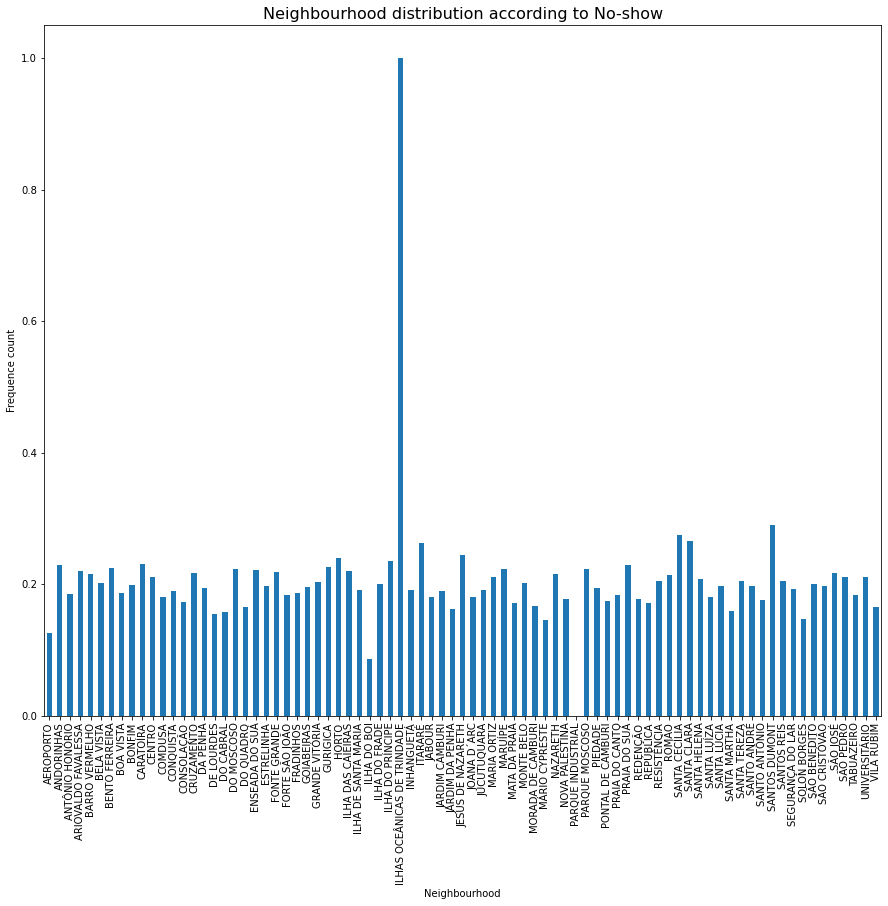

In [18]:
#Plot of Notcoming per neighbourdhood 
#Resize plot
#Title plot
plt.rcParams["figure.figsize"] = (15,12.7)
df.groupby('Neighbourhood').Notcoming.mean().plot(kind= 'bar')
plt.xlabel("Neighbourhood")
plt.ylabel('Frequence count')
plt.title('Neighbourhood distribution according to No-show', fontsize=16)

As per plot,Hospital ILHAS OCEANICAS DE TRINDANDE has a higher number of patients who showed up for their appointments,probably because it is located near patients 

### Research Question 2  (does receiving sms notifications affect patients presence on their appoitment?)

Text(0.5, 1.0, 'Gender distribution')

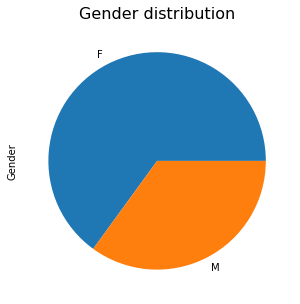

In [19]:
#distribution per gender
df['Gender'].value_counts().plot(kind='pie', figsize= (5,5));
plt.title('Gender distribution', fontsize=16)

Most of patients were females

Text(0.5, 1.0, 'SMS distribution')

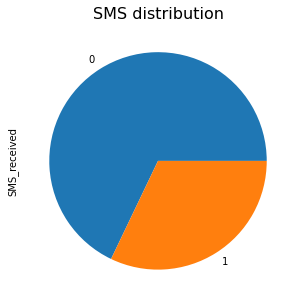

In [20]:
#distribution per SMS_received
df['SMS_received'].value_counts().plot(kind='pie', figsize= (5,5));
plt.title('SMS distribution', fontsize=16)

the majority of patients received sms notifications

In [21]:
df.groupby(['Gender', 'SMS_received']).Notcoming.mean()

Gender  SMS_received
F       0               0.165250
        1               0.277674
M       0               0.170066
        1               0.271631
Name: Notcoming, dtype: float64

SMS distribution per gender is approximaty equal

Text(0.5, 1.0, 'mean distribution of No-show for those who received sms per gender')

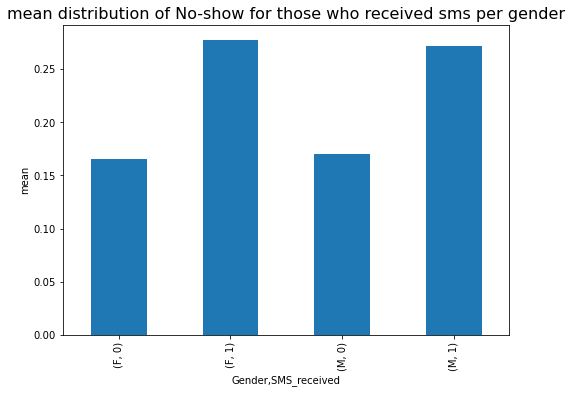

In [22]:
plt.rcParams["figure.figsize"] = (8,5.7)
df.groupby(['Gender', 'SMS_received']).Notcoming.mean().plot(kind='bar');
#plt.xlabel("")
plt.ylabel('mean')
plt.title('mean distribution of No-show for those who received sms per gender', fontsize=16)

mean distribution of no show per gender is similar

In [23]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'Nocoming', 'Notcoming'],
      dtype='object')

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110519 non-null  object        
 1   ScheduledDay    110519 non-null  object        
 2   AppointmentDay  110519 non-null  datetime64[ns]
 3   Age             110519 non-null  int64         
 4   Neighbourhood   110519 non-null  object        
 5   Scholarship     110519 non-null  int64         
 6   Hipertension    110519 non-null  int64         
 7   Diabetes        110519 non-null  int64         
 8   Alcoholism      110519 non-null  int64         
 9   Handcap         110519 non-null  int64         
 10  SMS_received    110519 non-null  int64         
 11  Nocoming        110519 non-null  object        
 12  Notcoming       110519 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(7), object(4)
memory usage: 11.4+ MB


<a id='conclusions'></a>
## Conclusions


This Dataset has 110527 observations and it doesn't have any duplicates variables. I managed to removed unnecessary variables to ease the Research. I dropped outliers in age of patients and the variable of interest in this study was no patient who didn't show up for their scheduled appointment 

the research confirmed that hospital locations affects the patients, whether their show up or not, also sms notifications doesn't affect patients’ presence for their appointment as the mean distribution of no show was approximately equal because the difference was not statically significant


